In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
import keras.backend as K

# Dataset

You can download the dataset from here :   https://www.kaggle.com/chetankv/dogs-cats-images      OR                     https://drive.google.com/open?id=1Q3RwG1TW82z6ZH1eZjUkQtFsXLpSZZkZ

## Data Augmentation and reshaping

In [2]:
img_width, img_height=150,150
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples=1000
nb_validation_samples=100
epochs=2
batch_size=20

if K.image_data_format() == 'channel_first':
    input_shape = (3,img_width, img_height)
else:
     input_shape = (img_width, img_height, 3)
        
train_datagen = ImageDataGenerator(
                 rescale = 1.  /  255,
                 shear_range = 0.2,
                 zoom_range=0.2,
                 horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale= 1./ 255)

train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(img_width,img_height),
                batch_size = batch_size,
                class_mode='binary')
              
validation_generator = test_datagen.flow_from_directory(
                validation_data_dir,
                target_size=(img_width,img_height),
                batch_size = batch_size,
                class_mode='binary')




Found 8000 images belonging to 2 classes.
Found 1920 images belonging to 2 classes.


# CNN Model

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
             metrics=['accuracy'])

# Train the model

In [ ]:
model.fit_generator(
                    train_generator,                    
                    steps_per_epoch=nb_train_samples,
                    epochs = epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples)



Epoch 1/2
   9/1000 [..............................] - ETA: 8:42 - loss: 1.0530 - accuracy: 0.4222

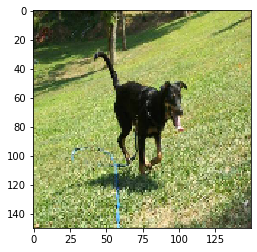

In [58]:
img_pred = image.load_img('data/test/dog.4325.jpg', target_size=(150,150))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)



# Predict

In [59]:
rslt = model.predict(img_pred)
print(rslt)

if rslt[0][0]==1:
    prediction="dog"
else:
    prediction="cat"
print(prediction)

   

[[1.]]
dog
